#**PUNE HOUSE PRICE PREDICTION MODEL**



#1)Data collection

In [1]:
import pandas as pd
df1=pd.read_csv('Pune house data.csv')
df1.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


#2)Data Preprocessing

Droping the columns which are less important

In [2]:
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'],axis='columns')
print('Rows and columns are = ', df2.shape)
df2.head()

Rows and columns are =  (13320, 5)


,size,total_sqft,bath,price,site_location
0,2 BHK,1056,2.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,62.00,Anandnagar
3,3 BHK,1521,3.0,95.00,Aundh
4,2 BHK,1200,2.0,51.00,Aundh Road


Handling missing values

In [3]:
df2.isnull().sum() #tells the no of rows for a column where value is not available

size             16
total_sqft        0
bath             73
price             0
site_location     1
dtype: int64

Since null values are very less as compared to total training examples(13320) we safley drop those examples

In [4]:
df3 = df2.dropna()
df3.isnull().sum()

size             0
total_sqft       0
bath             0
price            0
site_location    0
dtype: int64

In [5]:
df3.shape

(13246, 5)

#3)Feature Engineering

1)'size' column contgaines the size of house in terms of BHK( Bedroom Hall Kitchen)
To simply it we can create new column by the name 'bhk' and add only numeric value of how many BHK's

In [6]:
df3['size'].unique() #gives all unique values for the size columns

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [7]:
df4 = df3.copy()
# Using lambda function we can get the BHK numeric value
df4['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df4.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [8]:
df4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Note above, there are few records with range of the area like '1133 - 1384'. Lets write a function to identify such values

In [9]:
def is_float(x):
  try:
    float(x)
  except:
    return False

  return True
  # Test the function
print('is this (123) float value = %s' % (is_float(123)))
print('is this (1133 - 1384) float value = %s' % (is_float('1133 - 1384')))

is this (123) float value = True
is this (1133 - 1384) float value = False


In [10]:
#Lets apply this function to 'total_sqft' column
df4[~df4['total_sqft'].apply(is_float)].head(10)

,size,total_sqft,bath,price,site_location,bhk
30,4 BHK,2100 - 2850,4.0,186.000,Gultekdi,4
122,4 BHK,3067 - 8156,4.0,477.000,Ganeshkhind,4
137,2 BHK,1042 - 1105,2.0,54.005,Khadaki,2
165,2 BHK,1145 - 1340,2.0,43.490,Prabhat Road,2
188,2 BHK,1015 - 1540,2.0,56.800,Wakadewadi,2
410,1 BHK,34.46Sq. Meter,1.0,18.500,Ganeshkhind,1
549,2 BHK,1195 - 1440,2.0,63.770,Prabhat Road,2
648,9 Bedroom,4125Perch,9.0,265.000,Raviwar Peth,9
661,2 BHK,1120 - 1145,2.0,48.130,Tilak Road,2
672,4 Bedroom,3090 - 5002,4.0,445.000,Alandi Road,4


Since most the value are range of sqft, we can write afunction to get the average value from a range.

In [11]:
def convert_range_to_sqft(x):
  try:
    tokens = x.split('-')

    if len(tokens) == 2:
      return (float(tokens[0]) + float(tokens[1]))/2
    else:
      return float(x)
  except:
    return None
#Lets test the convert_range_to_sqft()
print('Return value for i/p 12345 = %s' % (convert_range_to_sqft('12345')))
print('Return value for i/p 1133 - 1384 = %s' % (convert_range_to_sqft('1133 - 1384')))
print('Return value for i/p 34.46Sq. Meter = %s' % (convert_range_to_sqft('34.46Sq. Meter')))


Return value for i/p 12345 = 12345.0
Return value for i/p 1133 - 1384 = 1258.5
Return value for i/p 34.46Sq. Meter = None


In [12]:
# Lets apply this function for total_sqft column
df5 = df4.copy()

df5.total_sqft = df4.total_sqft.apply(convert_range_to_sqft)
df5.head()

,size,total_sqft,bath,price,site_location,bhk
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3
3,3 BHK,1521.0,3.0,95.00,Aundh,3
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2


In [13]:
# Since our converion function will return null for values like 34.46Sq. Meter. Lets check for any null values in it
df5.total_sqft.isnull().sum()

46

In [14]:
# Lets dro the null training sets from total_sqft
df6 = df5.dropna()
df6.total_sqft.isnull().sum()

0

'price' column containes the price of house in lacka ( 1 lakh = 100000)
Price per square fit is important parameter in house prices.
So we can create new column by the name 'price_per_sqft' and add price per sqft in it. formula = (price * 100000)/total_sqft

In [15]:
df7=df6.copy()
df7['price_per_sqft']=(df6['price']*1000)/df6['total_sqft']
df7.head()

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,Alandi Road,2,36.998106
1,4 Bedroom,2600.0,5.0,120.00,Ambegaon Budruk,4,46.153846
2,3 BHK,1440.0,2.0,62.00,Anandnagar,3,43.055556
3,3 BHK,1521.0,3.0,95.00,Aundh,3,62.458909
4,2 BHK,1200.0,2.0,51.00,Aundh Road,2,42.500000


In [16]:
df7_stats=df7['price_per_sqft'].describe()
df7_stats

count     13200.000000
mean         79.208781
std        1067.271515
min           2.678298
25%          42.681651
50%          54.383315
75%          73.170732
max      120000.000000
Name: price_per_sqft, dtype: float64

#Outlier Removal

Normally square fit per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft)
If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier.
We will remove such outliers by keeping our minimum threshold per bhk to be 300 sqft

In [17]:
df7[(df7.total_sqft / df7.bhk) < 300]

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
9,6 Bedroom,1020.0,6.0,370.0,Bhavani Peth,6,362.745098
45,8 Bedroom,600.0,9.0,200.0,Kondhwa Budruk,8,333.333333
58,6 Bedroom,1407.0,4.0,150.0,Mundhawa,6,106.609808
68,8 Bedroom,1350.0,7.0,85.0,Pirangut,8,62.962963
70,3 Bedroom,500.0,3.0,100.0,Pune Railway Station,3,200.000000
...,...,...,...,...,...,...,...
13277,7 Bedroom,1400.0,7.0,218.0,Ghorpadi,7,155.714286
13279,6 Bedroom,1200.0,5.0,130.0,Gultekdi,6,108.333333
13281,5 Bedroom,1375.0,5.0,125.0,Hadapsar,5,90.909091
13303,5 Bedroom,774.0,5.0,70.0,Manik Bagh,5,90.439276


Note above we have 744 training examples where square fit per bedroom is less than 300. These are outliers, so we can remove them

In [18]:
df7.shape

(13200, 7)

In [19]:
df8 =df7[~((df7.total_sqft / df7.bhk) < 300)]
df8.shape

(12456, 7)

One standard deviation(1 Sigma) of the mean will cover 68% of the data. i. e. Data between (mean - std deviation) & (mean + std deviation) is 1 Sigma and which is equal to 68%
Here any datapin t outside the 1 Sigma deviation (68%) is outlier for us

In [20]:
df8.price_per_sqft.describe()

count    12456.000000
mean        63.086289
std         41.680753
min          2.678298
25%         42.105263
50%         52.941176
75%         69.166667
max       1764.705882
Name: price_per_sqft, dtype: float64

Text(0, 0.5, 'Count')

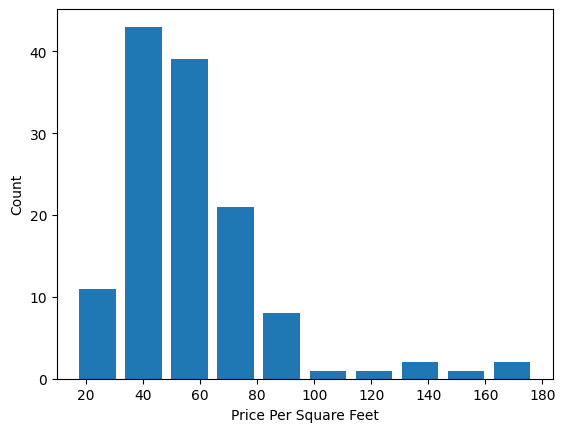

In [21]:
# Data visualization for 'price_per_sqft' for location 'Baner'
# Note here its normal distribuation of data so outlier removal using stad deviation and mean works perfectly here
import matplotlib.pyplot as plt
plt.hist(df8[df8.site_location == "Baner"].price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [22]:
df8.shape

(12456, 7)

In [23]:
# Function to remove outliers using pps(price per sqft)
import numpy as np
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean + std))] # 1 Sigma value i.e 68% of data
        df_out = pd.concat([df_out,reduced_df],ignore_index=True) # Storing data in 'df_out' dataframe
    return df_out

df9= remove_pps_outliers(df8)
df9.shape

(10883, 7)

Text(0, 0.5, 'Count')

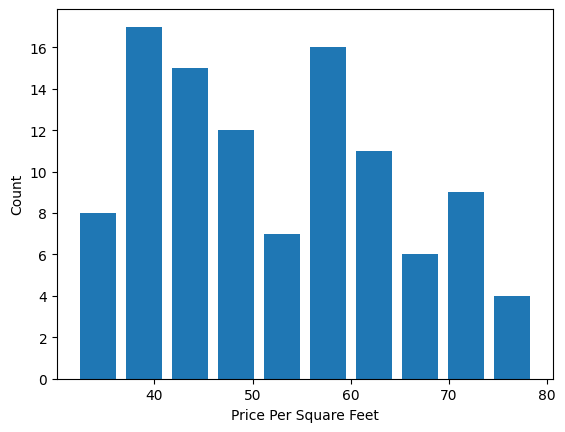

In [24]:
# Data visualization for 'price_per_sqft' for location 'Baner' after outlier removal
plt.hist(df9[df9.site_location == "Baner"].price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Generally number of bathrooms per BHK are (no of BHK) + 2.
So using above understanding we can identify the outliers and remove them

In [25]:
df9.bath.unique()

array([ 2.,  4.,  3.,  5.,  9.,  1.,  6.,  7.,  8., 12., 13., 16.])

In [26]:
df9[df9.bath>df9.bhk+2]

,size,total_sqft,bath,price,site_location,bhk,price_per_sqft
772,3 BHK,1806.0,6.0,116.0,Baner,3,64.230343
3067,6 BHK,11338.0,9.0,1000.0,Ghorpade Peth,6,88.198977
4231,4 Bedroom,7000.0,8.0,450.0,Karve Nagar,4,64.285714


In [27]:
df9.shape

(10883, 7)

In [28]:
df10=df9[df9.bath<(df9.bhk+2)]
df10.shape

(10800, 7)

In [29]:
df11=df10.drop(['size','price_per_sqft'],axis='columns')
df11.head()

,total_sqft,bath,price,site_location,bhk
0,1056.0,2.0,39.07,Alandi Road,2
1,2894.0,4.0,245.00,Alandi Road,4
2,1084.0,2.0,50.00,Alandi Road,2
3,1230.0,2.0,80.00,Alandi Road,2
4,1750.0,3.0,130.00,Alandi Road,3


#One Hot Encoding

In [30]:
dummies = pd.get_dummies(df11.site_location)
dummies.head()

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#Now lets add dummies dataframe to original dataframe and delete the location feature
df12=pd.concat([df11,dummies],axis='columns')
df12.head()

,total_sqft,bath,price,site_location,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,Alandi Road,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,Alandi Road,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df13=df12.drop(['site_location'],axis='columns')
df13.head()

,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df13.shape

(10800, 100)

#Creating independent and dependent variables

In [34]:
X=df13.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y=df13.price
y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

#Splitting the dataset into training and testing

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

#Model Selection

Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train.values, y_train)
lr_clf.score(X_test.values, y_test)

0.7865512904265346

Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train.values,y_train)
dt.score(X_test.values,y_test)

0.6144297831272376

In [62]:
from sklearn.ensemble import RandomForestRegressor
rforest=RandomForestRegressor()
rforest.fit(X_train.values,y_train)
rforest.score(X_test.values,y_test)

0.7813575399765391

#Use K Fold cross validation to measure accuracy of our Regression models

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit is used to randomize the each fold
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.76518281, 0.73826539, 0.78808253, 0.76237825, 0.8307291 ])

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit is used to randomize the each fold
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(DecisionTreeRegressor(), X, y, cv = cv)

array([0.66578503, 0.63578963, 0.66694018, 0.65392406, 0.72240084])

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit is used to randomize the each fold
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(RandomForestRegressor(), X, y, cv = cv)

array([0.7708894 , 0.73020609, 0.79906489, 0.76409353, 0.81643591])

In [53]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [55]:
round(predict_price('Baner',1000, 2, 2),2)

48.3